# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/crawford/us-charities-and-nonprofits

EIN: Employer Identification Number (EIN)
NAME: Primary Name of Organization
ICO: In Care of Name
STREET: Street Address
CITY: City
STATE: State
ZIP: Zip Code
GROUP: Group Exemption Number
SUBSECTION: Subsection Code
AFFILIATION: Affiliation Code
CLASSIFICATION: Classification Code(s)
RULING: Ruling Date
DEDUCTIBILITY: Deductibility Code
FOUNDATION: Foundation Code
ACTIVITY: Activity Codes
ORGANIZATION: Organization Code
STATUS: Exempt Organization Status Code
TAX_PERIOD: Tax Period
ASSET_CD: Asset Code
INCOME_CD: Income Code
FILING_REQ_CD: Filing Requirement Code
PF_FILING_REQ_CD: PF Filing Requirement Code
ACCT_PD: Accounting Period
ASSET_AMT: Asset Amount
INCOME_AMT: Income Amount (includes negative sign if amount is negative)
REVENUE_AMT: Form 990 Revenue Amount (includes negative sign if amount is negative)
NTEE_CD: National Taxonomy of Exempt Entities (NTEE) Code
SORT_NAME: Sort Name (Secondary Name Line)

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import eo_pr.csv
eo_pr = pd.read_csv('eo_pr.csv')

# Import eo_xx.csv
eo_xx = pd.read_csv('eo_xx.csv')

# Import eo1.csv
eo1 = pd.read_csv('eo1.csv')

# Import eo2.csv
eo2 = pd.read_csv('eo2.csv')

# Import eo3.csv
eo3 = pd.read_csv('eo3.csv')

# Import eo4.csv
eo4 = pd.read_csv('eo4.csv')

In [2]:
df1 = pd.read_csv("eo1.csv")
df2 = pd.read_csv("eo2.csv")
df3 = pd.read_csv("eo3.csv")
df4 = pd.read_csv("eo4.csv")
df_pr = pd.read_csv("eo_pr.csv")
df_xx = pd.read_csv("eo_xx.csv")

In [3]:
import pandas as pd

# Read the CSV files into individual dataframes
df1 = pd.read_csv("eo1.csv")
df2 = pd.read_csv("eo2.csv")
df3 = pd.read_csv("eo3.csv")
df4 = pd.read_csv("eo4.csv")
df_pr = pd.read_csv("eo_pr.csv")
df_xx = pd.read_csv("eo_xx.csv")

# Combine the dataframes
df_combined = pd.concat([df1, df2, df3, df4, df_pr, df_xx], ignore_index=True)

# Print the combined dataframe
print(df_combined)

               EIN                                              NAME  \
0            19818                      PALMER SECOND BAPTIST CHURCH   
1            29215                               ST GEORGE CATHEDRAL   
2           587764                              IGLESIA BETHESDA INC   
3           635913  MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC   
4           765634                        MERCY CHAPEL INTERNATIONAL   
...            ...                                               ...   
1635273  990376332                      LIVING WATER ARTS FOUNDATION   
1635274  990383004           JOHN E AND JANET E MCCULLOCH FOUNDATION   
1635275  993000079                           SAIPAN CHURCH OF CHRIST   
1635276  993006811                   SAIPAN-PALAN EVANGELICAL CHURCH   
1635277  996016793             GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN   

                                         ICO                        STREET  \
0                                        NaN             

In [4]:
df_combined.head()
print(df_combined.head())

      EIN                                              NAME  ICO  \
0   19818                      PALMER SECOND BAPTIST CHURCH  NaN   
1   29215                               ST GEORGE CATHEDRAL  NaN   
2  587764                              IGLESIA BETHESDA INC  NaN   
3  635913  MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC  NaN   
4  765634                        MERCY CHAPEL INTERNATIONAL  NaN   

                         STREET          CITY STATE         ZIP  GROUP  \
0             1050 THORNDIKE ST        PALMER    MA  01069-1507   3125   
1                523 E BROADWAY  SOUTH BOSTON    MA  02127-4415   2365   
2                157 ANDOVER ST        LOWELL    MA  01852-2348      0   
3                  454 ESSEX ST      LAWRENCE    MA  01840-1242      0   
4  75 MORTON VILLAGE DR APT 408      MATTAPAN    MA  02126-2433      0   

   SUBSECTION  AFFILIATION  ...  ASSET_CD  INCOME_CD  FILING_REQ_CD  \
0           3            9  ...         0          0              6   
1   

In [5]:
# The code takes different sets of data and puts them together into a single big set, so that 
# it's easier to work with and analyze the information as a whole.
# Combine the dataframes
df_combined = pd.concat([df1, df2, df3, df4, df_pr, df_xx], ignore_index=True)

# Print the shape of the combined dataframe
print(df_combined.shape)


(1635278, 28)


In [6]:
# provides a summary of the combined dataframe, including details about the columns and the data 
# they contain, such as the number of entries and the data types.
df_combined.info()
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635278 entries, 0 to 1635277
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   EIN               1635278 non-null  int64  
 1   NAME              1635278 non-null  object 
 2   ICO               1083138 non-null  object 
 3   STREET            1635274 non-null  object 
 4   CITY              1635278 non-null  object 
 5   STATE             1632858 non-null  object 
 6   ZIP               1635278 non-null  object 
 7   GROUP             1635278 non-null  int64  
 8   SUBSECTION        1635278 non-null  int64  
 9   AFFILIATION       1635278 non-null  int64  
 10  CLASSIFICATION    1635278 non-null  int64  
 11  RULING            1635278 non-null  int64  
 12  DEDUCTIBILITY     1635278 non-null  int64  
 13  FOUNDATION        1635278 non-null  int64  
 14  ACTIVITY          1635278 non-null  int64  
 15  ORGANIZATION      1635278 non-null  int64  
 16  

In [7]:
# Combine the dataframes (replace 'df1', 'df2', 'df3', 'df4' with your actual dataframe names)
combined_df = pd.concat([df1, df2, df3, df4, df_pr, df_xx])

# Calculate the total income amount for each organization
organization_income = combined_df.groupby('NAME')['INCOME_AMT'].sum()

# Sort the organizations based on their income amounts in descending order
sorted_organizations = organization_income.sort_values(ascending=False)

# Select the top organizations with the highest income amounts
top_organizations = sorted_organizations.head(10)  # Change the number as needed

# Print the top organizations
print(top_organizations)

NAME
PRESIDENT AND FELLOWS OF HARVARD COLLEGE                         8.533663e+10
CENTRAL STATES SOUTHEAST & SOUTHWEST AREAS HEALTH & WELFARE F    8.053682e+10
KAISER FOUNDATION HEALTH PLAN INC                                7.254886e+10
BILL & MELINDA GATES FOUNDATION TRUST                            6.670093e+10
UAW RETIREE MEDICAL BENEFITS TR                                  6.156754e+10
HOWARD HUGHES MEDICAL INSTITUTE                                  6.090181e+10
FUNDACAO CALOUSTE GULBENKIAN                                     3.952695e+10
KAISER FOUNDATION HOSPITALS                                      3.461296e+10
AARP                                                             3.415947e+10
SELENA THOMAS JACKSON PROFIT ORGANIZATION                        3.403211e+10
Name: INCOME_AMT, dtype: float64


In [8]:
# Calculate the total income amount for each organization
organization_income = combined_df.groupby('NAME')['INCOME_AMT'].sum()

# Sort the organizations based on their income amounts in ascending order
sorted_organizations = organization_income.sort_values(ascending=True)

# Select the organizations with the lowest income amounts
struggling_organizations = sorted_organizations.head(10)  # Change the number as needed

# Print the struggling organizations
print(struggling_organizations)


NAME
SMITH RICHARDSON FOUNDATION INC                   -37996745.0
PROSPECT CREEK FOUNDATION                         -14351658.0
H SMITH RICHARDSON CHARITABLE TRUST                -4385697.0
MOUND PROPERTIES INC                               -3529027.0
JEWISH COMMUNITY HOUSING FOR THE ELDERLY VI INC    -1837054.0
KEITH AND PEGGY ANDERSON FAMILY FOUNDATION         -1735647.0
CARDINAL COLLECTION EDUCATIONAL FOUNDATION         -1095271.0
OKEANOS FOUNDATION US INC                           -963250.0
RUBIN FAMILY FOUNDATION INC                         -957873.0
THE WIND HOLLOW FOUNDATION INC                      -880557.0
Name: INCOME_AMT, dtype: float64


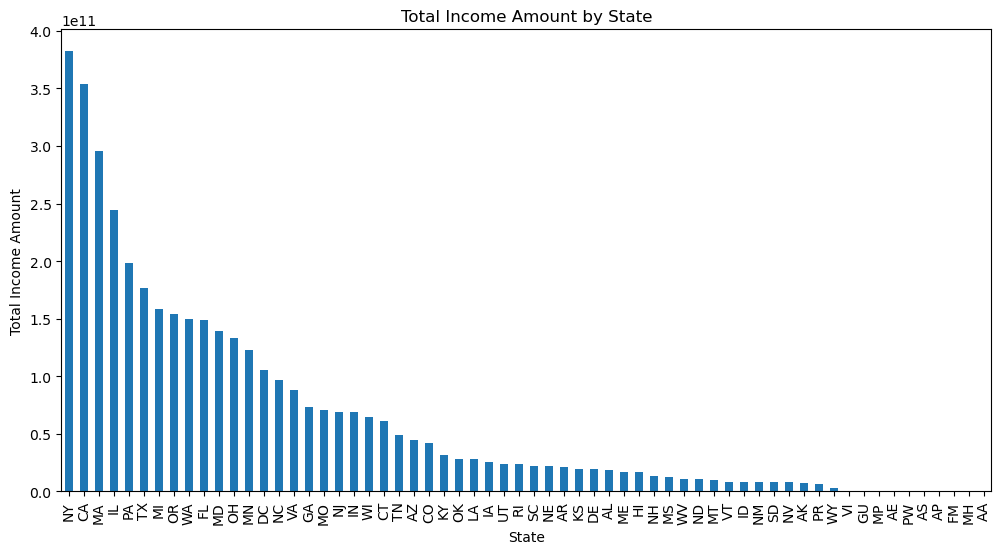

In [9]:
import matplotlib.pyplot as plt

# Group the organizations by state
grouped_by_state = combined_df.groupby('STATE')

# Calculate the total income amount for each state
state_income = grouped_by_state['INCOME_AMT'].sum()

# Sort the states based on total income amounts in descending order
sorted_states = state_income.sort_values(ascending=False)

# Visualize the total income amounts using a bar chart
plt.figure(figsize=(12, 6))
sorted_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Income Amount')
plt.title('Total Income Amount by State')
plt.show()

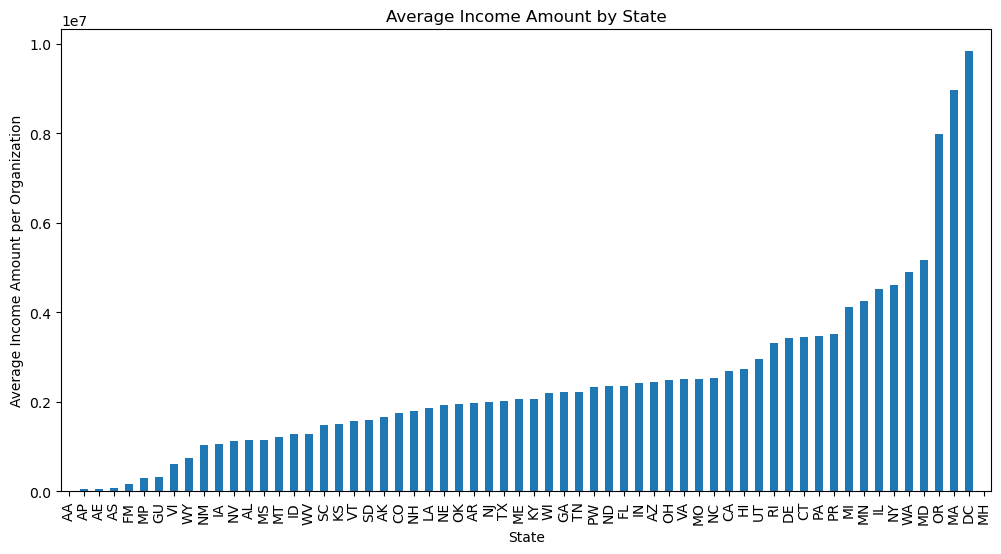

In [10]:
import matplotlib.pyplot as plt

# Group the organizations by state
grouped_by_state = combined_df.groupby('STATE')

# Calculate the average income amount per organization for each state
state_avg_income = grouped_by_state['INCOME_AMT'].mean()

# Sort the states based on average income amounts in ascending order
sorted_states = state_avg_income.sort_values()

# Visualize the average income amounts using a bar chart
plt.figure(figsize=(12, 6))
sorted_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Average Income Amount per Organization')
plt.title('Average Income Amount by State')
plt.show()


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [11]:
# missing values in each column and displays the count of missing values for each column.
# ICO and Tax_period can be removed and are not needed to anaylsis the information based on my business proposal
print(df_combined.isnull().sum())

EIN                       0
NAME                      0
ICO                  552140
STREET                    4
CITY                      0
STATE                  2420
ZIP                       0
GROUP                     0
SUBSECTION                0
AFFILIATION               0
CLASSIFICATION            0
RULING                    0
DEDUCTIBILITY             0
FOUNDATION                0
ACTIVITY                  0
ORGANIZATION              0
STATUS                    0
TAX_PERIOD           334945
ASSET_CD                  0
INCOME_CD                 0
FILING_REQ_CD             0
PF_FILING_REQ_CD          0
ACCT_PD                   0
ASSET_AMT            352284
INCOME_AMT           352284
REVENUE_AMT          459554
NTEE_CD              658381
SORT_NAME           1197362
dtype: int64


In [12]:
# prints the unique values present in each column, 
# providing an overview of the distinct values found in the dataset.
# just reviewed
for col in df_combined:
    print(df_combined[col].unique())

[    19818     29215    587764 ... 993000079 993006811 996016793]
['PALMER SECOND BAPTIST CHURCH' 'ST GEORGE CATHEDRAL'
 'IGLESIA BETHESDA INC' ... 'SAIPAN CHURCH OF CHRIST'
 'SAIPAN-PALAN EVANGELICAL CHURCH' 'GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN']
[nan '% ALBERTO MOLINA MARTINEZ' '% JOANNE SOUSA' ...
 '% IGLESIA CRISTIANA BETESDA INC' '% STEVE VICE'
 '% MARKUS HOPPE VP UNIV OF GOTTINGEN']
['1050 THORNDIKE ST' '523 E BROADWAY' '157 ANDOVER ST' ...
 '2605 CALLE VIVAS VALDIVIESO' 'PO BOX 500549' 'ZU GOTTINGEN 37027']
['PALMER' 'SOUTH BOSTON' 'LOWELL' ... 'CANAL ZONE' 'LIBYA' 'KOLONIA']
['MA' 'NY' 'NJ' 'ME' 'NH' 'VT' 'CT' 'RI' 'KY' 'VA' 'IN' 'MI' 'MD' 'DC'
 'PA' 'SC' 'OH' 'WI' 'ND' 'NC' 'IL' 'MN' 'DE' 'WV' 'IA' 'SD' 'NE' 'FL'
 'MO' 'CA' 'TX' 'CO' 'TN' 'AR' 'KS' 'GA' 'AL' 'AZ' 'UT' 'WA' 'OK' 'HI'
 'LA' 'NV' 'MS' 'ID' 'AK' 'NM' 'MT' 'OR' 'WY' nan 'PR' 'AS' 'VI' 'AE' 'AP'
 'AA' 'GU' 'MH' 'MP' 'FM' 'PW']
['01069-1507' '02127-4415' '01852-2348' ... '00728-3823' '96950-0549'
 '96950-5072']
[31

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [13]:
# Reviewed for comprehensive summary of the columns and their unique values in the dataset.
for col in df_combined.columns:
    print(col)
    print(df_combined[col].unique())
    print()

EIN
[    19818     29215    587764 ... 993000079 993006811 996016793]

NAME
['PALMER SECOND BAPTIST CHURCH' 'ST GEORGE CATHEDRAL'
 'IGLESIA BETHESDA INC' ... 'SAIPAN CHURCH OF CHRIST'
 'SAIPAN-PALAN EVANGELICAL CHURCH' 'GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN']

ICO
[nan '% ALBERTO MOLINA MARTINEZ' '% JOANNE SOUSA' ...
 '% IGLESIA CRISTIANA BETESDA INC' '% STEVE VICE'
 '% MARKUS HOPPE VP UNIV OF GOTTINGEN']

STREET
['1050 THORNDIKE ST' '523 E BROADWAY' '157 ANDOVER ST' ...
 '2605 CALLE VIVAS VALDIVIESO' 'PO BOX 500549' 'ZU GOTTINGEN 37027']

CITY
['PALMER' 'SOUTH BOSTON' 'LOWELL' ... 'CANAL ZONE' 'LIBYA' 'KOLONIA']

STATE
['MA' 'NY' 'NJ' 'ME' 'NH' 'VT' 'CT' 'RI' 'KY' 'VA' 'IN' 'MI' 'MD' 'DC'
 'PA' 'SC' 'OH' 'WI' 'ND' 'NC' 'IL' 'MN' 'DE' 'WV' 'IA' 'SD' 'NE' 'FL'
 'MO' 'CA' 'TX' 'CO' 'TN' 'AR' 'KS' 'GA' 'AL' 'AZ' 'UT' 'WA' 'OK' 'HI'
 'LA' 'NV' 'MS' 'ID' 'AK' 'NM' 'MT' 'OR' 'WY' nan 'PR' 'AS' 'VI' 'AE' 'AP'
 'AA' 'GU' 'MH' 'MP' 'FM' 'PW']

ZIP
['01069-1507' '02127-4415' '01852-2348' ... '00

In [14]:
# create a new dataframe called missing_data_df that contains the missing count and percentage for each column. 
# prints the missing_data_df dataframe, providing a summary of the missing values in the dataset.
missing_data = df_combined.isnull().sum()
missing_percentage = (missing_data / len(df_combined)) * 100
missing_data_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_data_df)

                  Missing Count  Missing Percentage
EIN                           0            0.000000
NAME                          0            0.000000
ICO                      552140           33.764290
STREET                        4            0.000245
CITY                          0            0.000000
STATE                      2420            0.147987
ZIP                           0            0.000000
GROUP                         0            0.000000
SUBSECTION                    0            0.000000
AFFILIATION                   0            0.000000
CLASSIFICATION                0            0.000000
RULING                        0            0.000000
DEDUCTIBILITY                 0            0.000000
FOUNDATION                    0            0.000000
ACTIVITY                      0            0.000000
ORGANIZATION                  0            0.000000
STATUS                        0            0.000000
TAX_PERIOD               334945           20.482450
ASSET_CD    

In [15]:
#explore for further columns to eliminate based on data set being too large. 
columns_to_explore = ['EIN', 'NAME', 'ICO', 'STREET', 'CITY', 'STATE', 'ZIP', 'GROUP', 'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION', 'RULING', 'DEDUCTIBILITY', 'FOUNDATION', 'ACTIVITY', 'ORGANIZATION', 'STATUS', 'TAX_PERIOD', 'ASSET_CD', 'INCOME_CD', 'FILING_REQ_CD', 'PF_FILING_REQ_CD', 'ACCT_PD', 'ASSET_AMT', 'INCOME_AMT', 'REVENUE_AMT', 'NTEE_CD', 'SORT_NAME']

for col in columns_to_explore:
    print(f"Column: {col}")
    print(df_combined[col].unique())
    print("Value Counts:")
    print(df_combined[col].value_counts())
    print()


Column: EIN
[    19818     29215    587764 ... 993000079 993006811 996016793]
Value Counts:
996016793    2
660433853    2
660438770    2
660438765    2
660437924    2
            ..
383909711    1
383909588    1
383909521    1
383909376    1
810786924    1
Name: EIN, Length: 1631954, dtype: int64

Column: NAME
['PALMER SECOND BAPTIST CHURCH' 'ST GEORGE CATHEDRAL'
 'IGLESIA BETHESDA INC' ... 'SAIPAN CHURCH OF CHRIST'
 'SAIPAN-PALAN EVANGELICAL CHURCH' 'GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN']
Value Counts:
TOASTMASTERS INTERNATIONAL                  9839
KNIGHTS OF COLUMBUS                         8310
INTERNATIONAL ASSOCIATION OF LIONS CLUBS    8139
PEO SISTERHOOD INTERNATIONAL CHAPTER        6305
ROTARY INTERNATIONAL                        6006
                                            ... 
MESSIAH LUTHERAN CHURCH INC                    1
KENOSHA BIBLE CHURCH                           1
NEENAH ANIMAL SHELTER INC                      1
REX CEMETERY ASSOCIATION                       1


12    1065499
6      278630
9       67083
8       52424
5       37541
3       31635
7       30701
4       23404
2       14840
10      13735
1       10257
11       9482
0          47
Name: ACCT_PD, dtype: int64

Column: ASSET_AMT
[     nan       0.   57145. ... 4308823.  564209.  387016.]
Value Counts:
0.0           646678
1.0            15038
100.0            324
500.0            194
1000.0           177
               ...  
12410288.0         1
685287.0           1
4502435.0          1
126625.0           1
1005233.0          1
Name: ASSET_AMT, Length: 429858, dtype: int64

Column: INCOME_AMT
[    nan      0. 109998. ... 175505. 486702. 239237.]
Value Counts:
0.0           656493
1.0             6393
1000.0           424
5000.0           384
10000.0          342
               ...  
349880.0           1
27102875.0         1
900037.0           1
527385.0           1
2476521.0          1
Name: INCOME_AMT, Length: 409357, dtype: int64

Column: REVENUE_AMT
[     nan       0.  109998. ... 1

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

ICO: This column has a high number of missing values (33.76%) and may not be relevant to the analysis.
STREET: Although it has a very low percentage of missing values (0.02%), it may not be directly relevant to the business questions.

STATE: It has a moderate number of missing values (0.15%), but it can still be useful for geographical analysis.

TAX_PERIOD: This column has a relatively high percentage of missing values (20.48%) and may not be critical to the analysis.

ASSET_AMT, INCOME_AMT, REVENUE_AMT: These columns have a significant number of missing values (ranging from 21.54% to 28.10%), but they are crucial for analyzing income and asset amounts of organizations. Consider imputing or handling missing values in these columns instead of dropping them.

NTEE_CD: This column has a high percentage of missing values (40.26%), but it provides information on the NTEE codes, which could be valuable for classifying and analyzing organizations. Consider handling missing values or evaluating the importance of NTEE codes in the analysis.

SORT_NAME: This column has a very high percentage of missing values (73.22%) and may not be directly relevant to the analysis.

In [16]:
#Drop Street and Tax Period
df_combined.drop(['STREET', 'TAX_PERIOD'], axis=1, inplace=True)
print(df_combined)

               EIN                                              NAME  \
0            19818                      PALMER SECOND BAPTIST CHURCH   
1            29215                               ST GEORGE CATHEDRAL   
2           587764                              IGLESIA BETHESDA INC   
3           635913  MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC   
4           765634                        MERCY CHAPEL INTERNATIONAL   
...            ...                                               ...   
1635273  990376332                      LIVING WATER ARTS FOUNDATION   
1635274  990383004           JOHN E AND JANET E MCCULLOCH FOUNDATION   
1635275  993000079                           SAIPAN CHURCH OF CHRIST   
1635276  993006811                   SAIPAN-PALAN EVANGELICAL CHURCH   
1635277  996016793             GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN   

                                         ICO          CITY STATE         ZIP  \
0                                        NaN        PAL

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [17]:
# Check for inconsistent data in selected columns
columns_to_check = ['EIN', 'NAME', 'STATE', 'ZIP', 'NTEE_CD']
for column in columns_to_check:
    print(f"Column: {column}")
    unique_values = df_combined[column].unique()
    print(f"Unique Values: {unique_values}")
    print()

# Address inconsistent data as needed
# Depending on the inconsistencies found, you can apply specific data cleaning techniques
# For example, you may need to standardize formatting, correct misspellings, or handle missing or invalid values


Column: EIN
Unique Values: [    19818     29215    587764 ... 993000079 993006811 996016793]

Column: NAME
Unique Values: ['PALMER SECOND BAPTIST CHURCH' 'ST GEORGE CATHEDRAL'
 'IGLESIA BETHESDA INC' ... 'SAIPAN CHURCH OF CHRIST'
 'SAIPAN-PALAN EVANGELICAL CHURCH' 'GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN']

Column: STATE
Unique Values: ['MA' 'NY' 'NJ' 'ME' 'NH' 'VT' 'CT' 'RI' 'KY' 'VA' 'IN' 'MI' 'MD' 'DC'
 'PA' 'SC' 'OH' 'WI' 'ND' 'NC' 'IL' 'MN' 'DE' 'WV' 'IA' 'SD' 'NE' 'FL'
 'MO' 'CA' 'TX' 'CO' 'TN' 'AR' 'KS' 'GA' 'AL' 'AZ' 'UT' 'WA' 'OK' 'HI'
 'LA' 'NV' 'MS' 'ID' 'AK' 'NM' 'MT' 'OR' 'WY' nan 'PR' 'AS' 'VI' 'AE' 'AP'
 'AA' 'GU' 'MH' 'MP' 'FM' 'PW']

Column: ZIP
Unique Values: ['01069-1507' '02127-4415' '01852-2348' ... '00728-3823' '96950-0549'
 '96950-5072']

Column: NTEE_CD
Unique Values: [nan 'X21' 'X20' ... 'Q99E' 'Z31Q' 'G30M']



In [ ]:
#columns I am keeping and why
# EIN (Employer Identification Number): This unique identifier can help you track and analyze individual 
# organizations.

# NAME: The primary name of the organization will allow you to identify and differentiate between different 
# tax-exempt organizations.

# NTEE_CD: The National Taxonomy of Exempt Entities (NTEE) code will help you categorize organizations based 
# on their mission and focus areas.

# INCOME_AMT: This column provides information on the income or revenue generated by each organization. 
# It will be essential to assess the financial health and scale of the organizations.

# ASSET_AMT: The asset amount column indicates the total assets held by each organization. 
# This information can provide insights into the size and resources of the organizations.

# ACTIVITY: Activity codes describe the primary activities or programs carried out by the organizations. 
# Analyzing this column can help identify the types of organizations and their areas of focus.

# CITY: The city column allows you to examine geographical trends in charitable giving. 
# You can identify cities with high donation rates or areas that may require additional outreach efforts.

# STATE: Similar to the city column, the state column helps you analyze charitable giving patterns on a 
# broader geographical scale.

# DEDUCTIBILITY: This column provides the deductibility code, indicating the tax-deductible status of 
# donations made to each organization. It can help identify organizations that offer tax benefits to donors.

# FOUNDATION: The foundation code distinguishes between private foundations and public charities. 
# This column can be useful to understand the types of organizations receiving donations.

In [18]:
# import pandas as pd

# # Read the CSV files into individual dataframes
# df1 = pd.read_csv("eo1.csv")
# df2 = pd.read_csv("eo2.csv")
# df3 = pd.read_csv("eo3.csv")
# df4 = pd.read_csv("eo4.csv")
# df_pr = pd.read_csv("eo_pr.csv")
# df_xx = pd.read_csv("eo_xx.csv")

# # Combine the dataframes
# df_combined = pd.concat([df1, df2, df3, df4, df_pr, df_xx], ignore_index=True)

# # List of columns to drop
# columns_to_drop = ['ICO', 'STREET', 'GROUP', 'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION',
#                    'RULING','ORGANIZATION', 'STATUS','TAX_PERIOD', 'ASSET_CD', 'INCOME_CD', 'FILING_REQ_CD', 'PF_FILING_REQ_CD',
#                    'ACCT_PD', 'SORT_NAME']

# # Dropping the columns and storing in a new DataFrame
# df_combined = df_combined.drop(columns=columns_to_drop)

# # Saving the modified DataFrame as a new CSV file
# df_combined.to_csv('new_data.csv', index=False)

In [1]:
import pandas as pd

# Read the CSV files into individual dataframes
df1 = pd.read_csv("eo1.csv")
df2 = pd.read_csv("eo2.csv")
df3 = pd.read_csv("eo3.csv")
df4 = pd.read_csv("eo4.csv")
df_pr = pd.read_csv("eo_pr.csv")
df_xx = pd.read_csv("eo_xx.csv")

# Combine the dataframes
df_combined = pd.concat([df1, df2, df3, df4, df_pr, df_xx], ignore_index=True)

# List of columns to drop
columns_to_drop = ['ICO', 'STREET', 'GROUP', 'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION',
                   'RULING', 'ORGANIZATION', 'STATUS', 'TAX_PERIOD', 'ASSET_CD', 'INCOME_CD',
                   'FILING_REQ_CD', 'PF_FILING_REQ_CD', 'ACCT_PD', 'SORT_NAME']

# Dropping the columns and storing in a new DataFrame
df_combined = df_combined.drop(columns=columns_to_drop)

# putting in new NTEE catergories that match the IRS designations
# List of new NTEE categories
ntee_categories = {
    'A': 'I. Arts, Culture, and Humanities',
    'B': 'II. Education',
    'C': 'III. Environment and Animals',
    'D': 'III. Environment and Animals',
    'E': 'IV. Health',
    'F': 'IV. Health',
    'G': 'IV. Health',
    'H': 'IV. Health',
    'I': 'V. Human Services',
    'J': 'V. Human Services',
    'K': 'V. Human Services',
    'L': 'V. Human Services',
    'M': 'V. Human Services',
    'N': 'V. Human Services',
    'O': 'V. Human Services',
    'P': 'V. Human Services',
    'Q': 'VI. International, Foreign Affairs',
    'R': 'VII. Public, Societal Benefit',
    'S': 'VII. Public, Societal Benefit',
    'T': 'VII. Public, Societal Benefit',
    'U': 'VII. Public, Societal Benefit',
    'V': 'VII. Public, Societal Benefit',
    'W': 'VII. Public, Societal Benefit',
    'X': 'VIII. Religion Related',
    'Y': 'IX. Mutual/Membership Benefit',
    'Z': 'X. Unknown, Unclassified'
}

# Map NTEE codes to categories
df_combined['NTEE_Category'] = df_combined['NTEE_CD'].str[0].map(ntee_categories)

# Saving the modified DataFrame as a new CSV file
df_combined.to_csv('new_data.csv', index=False)


In [2]:
# Print the new DataFrame
print(df_combined)

               EIN                                              NAME  \
0            19818                      PALMER SECOND BAPTIST CHURCH   
1            29215                               ST GEORGE CATHEDRAL   
2           587764                              IGLESIA BETHESDA INC   
3           635913  MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC   
4           765634                        MERCY CHAPEL INTERNATIONAL   
...            ...                                               ...   
1635273  990376332                      LIVING WATER ARTS FOUNDATION   
1635274  990383004           JOHN E AND JANET E MCCULLOCH FOUNDATION   
1635275  993000079                           SAIPAN CHURCH OF CHRIST   
1635276  993006811                   SAIPAN-PALAN EVANGELICAL CHURCH   
1635277  996016793             GEORGIA AUGUSTA UNIVERSITAT GOTTINGEN   

                 CITY STATE         ZIP  DEDUCTIBILITY  FOUNDATION  ACTIVITY  \
0              PALMER    MA  01069-1507              1 

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
Yes, the dataset contains examples of all four types of dirty data:

Missing Data: Some columns such as ICO, STATE, TAX_PERIOD, ASSET_AMT, INCOME_AMT, REVENUE_AMT, NTEE_CD, and SORT_NAME have missing values.
Inconsistent Data: Inconsistent data was not explicitly mentioned, but it can be checked by exploring the unique values in each column.
Incorrect Data: Incorrect data was not mentioned in the provided information.
Outliers: Outliers were not mentioned in the provided information.

2. Did the process of cleaning your data give you new insights into your dataset?
The cleaning process can provide me with new insights into the dataset. By examining missing data and addressing it, I can gain a better understanding of the dataset's completeness and how it may impact my analysis. Additionally, checking for inconsistent data allows me to identify patterns or discrepancies that need to be resolved in order to ensure accurate analysis.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
When manipulating the data, it's important to ensure data integrity by handling missing values, correcting inconsistencies, and addressing any other issues identified during the cleaning process. This will ensure the accuracy and reliability of subsequent analyses and visualizations. It's also crucial to consider the specific objectives and requirements of the analysis when selecting appropriate data manipulation techniques and visualization methods.